# Compare US State energy production, consumption, and expenditure
This is an exploratory analysis for the energy production, consumption, and expenditure of the US states in 2020.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read data
df = pd.read_csv('../data/StateEnergyRankings.csv')

df.head()

,State,"Total Energy Production, Trillion Btu","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank"
0,WY,5884,3,874,3,6703,1
1,TX,23329,1,461,6,3703,10
2,AK,1349,13,874,2,6429,2
3,PA,9492,2,263,30,2890,36
4,ND,4275,7,804,4,6223,3


First, let's check the top 10 states for each category (Production, consumptiohn, and expenditure).
A barplot of the states ranked in accending order, where the rank #1 is listed at the top of the chart.

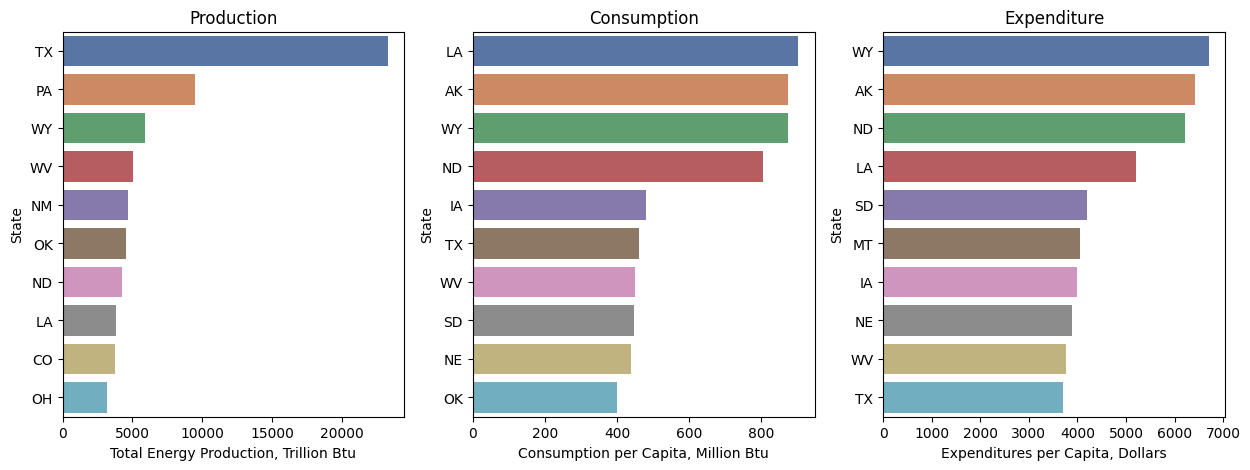

In [37]:
#graph top 10 states for production, consumption, and expenditure
fig1, axes = plt.subplots(1, 3, figsize=(15,5))
sns.set_palette("deep")

#Production
productionRanking = df.sort_values(by=['Production, Rank'])
sns.barplot(data=productionRanking[:10], y='State', x='Total Energy Production, Trillion Btu', ax=axes[0])
axes[0].set_title('Production')

#Consumption
consumptionRanking = df.sort_values(by=['Consumption per Capita, Rank'])
sns.barplot(data=consumptionRanking[:10], y='State', x='Consumption per Capita, Million Btu', ax=axes[1])
axes[1].set_title('Consumption')

#Expenditure
expenditureRanking = df.sort_values(by=['Expenditures per Capita, Rank'])
histExpenditureRanking = sns.barplot(data=expenditureRanking[:10], y='State', x='Expenditures per Capita, Dollars', ax=axes[2])
axes[2].set_title('Expenditure')

plt.show()

Texas is the highest energy production state. In fact, the amount of energy produced is much higher than the next ranking state.

If we look at the top 10 states across the three categories, there are several states ranked top 10 in all categories: TX, WY, WV, LA.
Is there a correlation between the three categories?

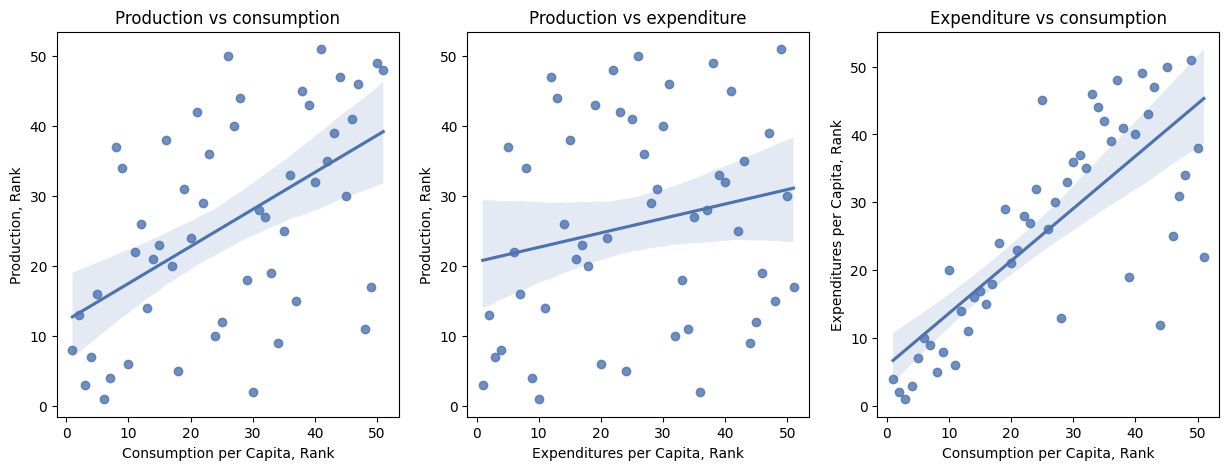

In [38]:
#Graph scatterplot comparing two categories
fig2, axes2 = plt.subplots(1, 3, figsize=(15,5))

#Production vs consumption
sns.regplot(data=df, x='Consumption per Capita, Rank', y='Production, Rank', ax=axes2[0])
axes2[0].set_title('Production vs consumption')

#Production vs expenditure
sns.regplot(data=df, x='Expenditures per Capita, Rank', y='Production, Rank', ax=axes2[1])
axes2[1].set_title('Production vs expenditure')

#Expenditure vs consumption
sns.regplot(data=df, x='Consumption per Capita, Rank', y='Expenditures per Capita, Rank', ax=axes2[2])
axes2[2].set_title('Expenditure vs consumption')

plt.show()

Based on the correlation plots, there is a strong correlation betwene energy expenditure and consumption. This is expected since the more energy a state uses, the more it spends.
Production vs consumption has a slightly weaker correlation, and production vs expenditure is very weakly correlated.